## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [10]:
df = pd.read_csv('../../data/2018_100000_sample.csv')
df2 = pd.read_csv('../../data/127000_rand.csv')
df2['month'] = pd.DatetimeIndex(df2['fl_date']).month # adding month column to second df 
df2['year'] = pd.DatetimeIndex(df2['fl_date']).year
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year
0,2018-11-26,UA,UA_CODESHARE,UA,6006,YV,N82338,6006,10140,ABQ,"Albuquerque, NM",12266,IAH,"Houston, TX",1725,1720.0,-5.0,12.0,1732.0,2007.0,18.0,2040,2025.0,-15.0,0,NaN,0,N,135,125.0,95.0,1,744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2018
1,2018-08-27,WN,WN,WN,1637,WN,N266WN,1637,14122,PIT,"Pittsburgh, PA",12892,LAX,"Los Angeles, CA",825,823.0,-2.0,13.0,836.0,1014.0,18.0,1040,1032.0,-8.0,0,NaN,0,N,315,309.0,278.0,1,2136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2018
2,2018-11-03,AA,AA_CODESHARE,AA,5149,OH,N710PS,5149,15096,SYR,"Syracuse, NY",11057,CLT,"Charlotte, NC",1504,1504.0,0.0,6.0,1510.0,1656.0,28.0,1715,1724.0,9.0,0,NaN,0,N,131,140.0,106.0,1,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2018
3,2018-02-14,AA,AA,AA,692,AA,N274AY,692,14107,PHX,"Phoenix, AZ",12173,HNL,"Honolulu, HI",1205,1220.0,15.0,26.0,1246.0,1629.0,4.0,1606,1633.0,27.0,0,NaN,0,N,421,433.0,403.0,1,2917,15.0,0.0,12.0,0.0,0.0,NaN,NaN,NaN,NaN,2,2018
4,2018-04-03,UA,UA_CODESHARE,UA,5064,OO,N943SW,5064,13930,ORD,"Chicago, IL",13184,MBS,"Saginaw/Bay City/Midland, MI",750,738.0,-12.0,28.0,806.0,947.0,6.0,1000,953.0,-7.0,0,NaN,0,N,70,75.0,41.0,1,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2018


In [11]:
print(df.shape)
print(df2.shape)
#have same shape with month columns so can use for grouping analysis

(235403, 44)
(127480, 44)


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127480 entries, 0 to 127479
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              127480 non-null  object 
 1   mkt_unique_carrier   127480 non-null  object 
 2   branded_code_share   127480 non-null  object 
 3   mkt_carrier          127480 non-null  object 
 4   mkt_carrier_fl_num   127480 non-null  int64  
 5   op_unique_carrier    127480 non-null  object 
 6   tail_num             127090 non-null  object 
 7   op_carrier_fl_num    127480 non-null  int64  
 8   origin_airport_id    127480 non-null  int64  
 9   origin               127480 non-null  object 
 10  origin_city_name     127480 non-null  object 
 11  dest_airport_id      127480 non-null  int64  
 12  dest                 127480 non-null  object 
 13  dest_city_name       127480 non-null  object 
 14  crs_dep_time         127480 non-null  int64  
 15  dep_time         

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/ <BR>
Outliers?

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [12]:
avg_delay_18 = df.groupby(by='month').agg('mean')['arr_delay']
avg_delay_18
# Aug is the longest avg arr_delay
# maybe everyone returning from summer holidays?

month
1      3.980921
2      3.337907
3      2.297539
4      3.346341
5      5.739815
6      8.497267
7      8.654063
8     10.157431
9      3.289269
10     3.091049
11     5.709791
12     4.145989
Name: arr_delay, dtype: float64

In [13]:
avg_delay = df2.groupby(by=['year', 'month']).agg('mean')['arr_delay']
avg_delay


year  month
2018  1         2.612236
      2         3.236706
      3         1.366942
      4         3.209870
      5         6.713053
      6         9.553941
      7         7.403049
      8         9.383193
      9         2.818785
      10        2.485421
      11        6.124280
      12        2.384839
2019  1         4.907951
      2        10.229787
      3         4.430387
      4         3.992057
      5         6.364669
      6        11.306337
      7        10.620727
      8         7.458461
      9         1.062308
      10        3.275162
      11        0.563135
      12        6.477413
Name: arr_delay, dtype: float64

In [14]:
df2_filter = df2.loc[df2['arr_delay'] < 50]

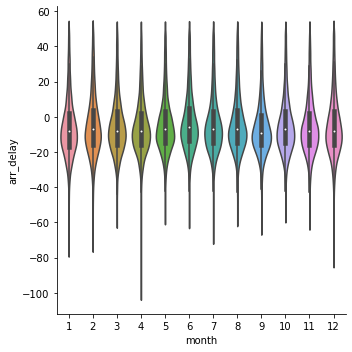

In [15]:
sns.catplot(data=df2_filter, kind="violin", x='month', y='arr_delay')

<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

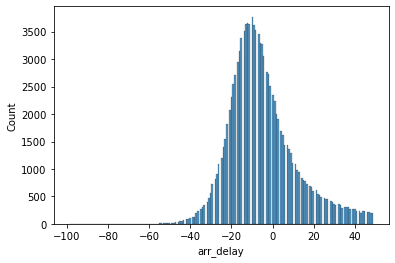

In [16]:
sns.histplot(df2_filter, x='arr_delay')
# So most flights are early it seems

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [17]:
df2.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year
0,2018-06-07,DL,DL,DL,1826,DL,N805DN,1826,10397,ATL,"Atlanta, GA",11697,FLL,"Fort Lauderdale, FL",1310,1322.0,12.0,8.0,1330.0,1826.0,8.0,1501,1834.0,NaN,0,NaN,1,N,111,NaN,NaN,1,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,-4.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018
2,2018-06-07,DL,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,-1.0,22.0,1846.0,2012.0,10.0,2034,2022.0,-12.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018
3,2018-06-07,DL,DL,DL,2415,DL,N988AT,2415,10397,ATL,"Atlanta, GA",11618,EWR,"Newark, NJ",2232,2224.0,-8.0,21.0,2245.0,29.0,3.0,41,32.0,-9.0,0,NaN,0,N,129,128.0,104.0,1,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018
4,2018-06-07,DL,DL,DL,2444,DL,N391DA,2444,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1100,1234.0,94.0,19.0,1253.0,1346.0,11.0,1243,1357.0,74.0,0,NaN,0,N,103,83.0,53.0,1,337,0.0,0.0,5.0,0.0,69.0,NaN,NaN,NaN,NaN,6,2018


In [18]:
df2['o_hour'] = round(df2['dep_time'], -2)/100
df2['a_hour'] = round(df2['arr_time'], -2)/100

In [19]:
o_taxi = df2.groupby(by='o_hour').agg({'taxi_out':'mean', 'flights':'sum'}).round(2)
o_taxi

,taxi_out,flights
o_hour,,
0.0,16.27,452
1.0,15.25,241
2.0,13.30,56
3.0,12.25,36
4.0,14.25,61
5.0,15.10,2657
6.0,16.55,8717
7.0,17.42,7894
8.0,19.17,8201


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scale = StandardScaler()
scale = scale.fit_transform(o_taxi)

scale_df = pd.DataFrame(scale, columns=['taxi_out', 'flights'])
scale_df


,taxi_out,flights
0,-0.310710,-1.428551
1,-0.946084,-1.494554
2,-2.160769,-1.552425
3,-2.814830,-1.558681
4,-1.568999,-1.550861
5,-1.039521,-0.738800
6,-0.136294,1.156842
7,0.405643,0.899398
8,1.495745,0.995431
9,1.097079,0.630379


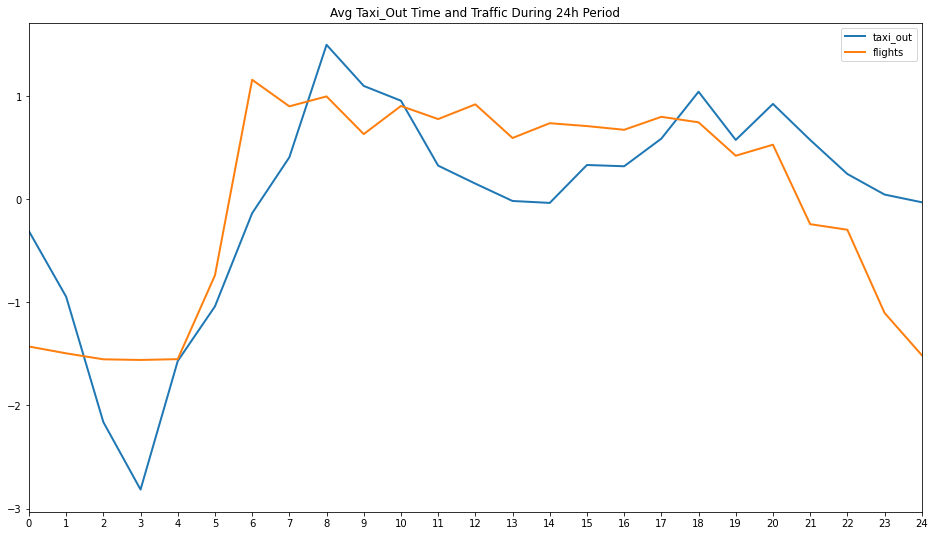

In [16]:
fig, ax = plt.subplots(figsize=(16,9))

plt.plot(scale_df.index, scale_df['taxi_out'], linewidth=2.0)
plt.plot(scale_df.index, scale_df['flights'], linewidth=2.0)
plt.legend(scale_df)
plt.xticks(np.arange(0, 25, step=1))
plt.xlim(left=0, right=24)
plt.title('Avg Taxi_Out Time and Traffic During 24h Period')

plt.show()

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [22]:
df2.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,o_hour,a_hour
0,2018-06-07,DL,DL,DL,1826,DL,N805DN,1826,10397,ATL,"Atlanta, GA",11697,FLL,"Fort Lauderdale, FL",1310,1322.0,12.0,8.0,1330.0,1826.0,8.0,1501,1834.0,NaN,0,NaN,1,N,111,NaN,NaN,1,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,13.0,18.0
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,-4.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,10.0,12.0
2,2018-06-07,DL,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,-1.0,22.0,1846.0,2012.0,10.0,2034,2022.0,-12.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,18.0,20.0
3,2018-06-07,DL,DL,DL,2415,DL,N988AT,2415,10397,ATL,"Atlanta, GA",11618,EWR,"Newark, NJ",2232,2224.0,-8.0,21.0,2245.0,29.0,3.0,41,32.0,-9.0,0,NaN,0,N,129,128.0,104.0,1,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,22.0,0.0
4,2018-06-07,DL,DL,DL,2444,DL,N391DA,2444,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1100,1234.0,94.0,19.0,1253.0,1346.0,11.0,1243,1357.0,74.0,0,NaN,0,N,103,83.0,53.0,1,337,0.0,0.0,5.0,0.0,69.0,NaN,NaN,NaN,NaN,6,2018,12.0,14.0


In [23]:
df2_late = df2.loc[df2['arr_delay'] > 0] 
total = df2_late.shape[0] #43912 total flights late
dep_late = df2_late.loc[df2_late['dep_delay'] > 0].shape[0]
per_delay = round(dep_late / total,2)*100

print(per_delay, "% of flights that arrive late are already late before they leave")
# 71% of flights that arrive late are already late before they leave

71.0 % of flights that arrive late are already late before they leave


In [24]:
# where airlines able to increase speed in the air after a delay or not? 
# show for flights w dep_delay expected airtive vs actual airtime
        # dep delay amount, arrival del amounr
        # if same then no, if positive then yes

df2_delay_var = df2_late.groupby(by='month').agg('mean')[['dep_delay', 'arr_delay']].round(2)
df2_delay_var['var'] = df2_delay_var['arr_delay'] - df2_delay_var['dep_delay']
print(" The average variance between dep_delay and arr_delay is: \n", np.mean(df2_delay_var['var']).round(2), 'minutes... \n This means that flights are arrive even more late than when then leave if they are delayed.' )
df2_delay_var

 The average variance between dep_delay and arr_delay is: 
 3.44 minutes... 
 This means that flights are arrive even more late than when then leave if they are delayed.


,dep_delay,arr_delay,var
month,,,
1,36.05,39.43,3.38
2,36.45,41.08,4.63
3,32.33,35.01,2.68
4,34.64,37.78,3.14
5,38.16,41.39,3.23
6,40.23,44.02,3.79
7,44.06,46.47,2.41
8,39.90,43.42,3.52
9,32.36,36.47,4.11


#### **Task 6**: How many states cover 50% of US air traffic? 

In [25]:
df2.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,o_hour,a_hour
0,2018-06-07,DL,DL,DL,1826,DL,N805DN,1826,10397,ATL,"Atlanta, GA",11697,FLL,"Fort Lauderdale, FL",1310,1322.0,12.0,8.0,1330.0,1826.0,8.0,1501,1834.0,NaN,0,NaN,1,N,111,NaN,NaN,1,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,13.0,18.0
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,-4.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,10.0,12.0
2,2018-06-07,DL,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,-1.0,22.0,1846.0,2012.0,10.0,2034,2022.0,-12.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,18.0,20.0
3,2018-06-07,DL,DL,DL,2415,DL,N988AT,2415,10397,ATL,"Atlanta, GA",11618,EWR,"Newark, NJ",2232,2224.0,-8.0,21.0,2245.0,29.0,3.0,41,32.0,-9.0,0,NaN,0,N,129,128.0,104.0,1,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,22.0,0.0
4,2018-06-07,DL,DL,DL,2444,DL,N391DA,2444,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1100,1234.0,94.0,19.0,1253.0,1346.0,11.0,1243,1357.0,74.0,0,NaN,0,N,103,83.0,53.0,1,337,0.0,0.0,5.0,0.0,69.0,NaN,NaN,NaN,NaN,6,2018,12.0,14.0


In [26]:
# using origin_airport_id lets break out the state from the string and then can groupby that
df2['state'] = df2['origin_city_name'].str[-2:]
df2_temp = pd.DataFrame(df2.groupby(by='state').count()['fl_date'].sort_values(ascending=False))
df2_temp['cum_percent'] = df2_temp.cumsum()/df2_temp.sum()
print(df2_temp.loc[df2_temp['cum_percent'] < 0.54].index.__len__(), "states make up 53% of total traffic in the US")

df2_temp.loc[df2_temp['cum_percent'] < 0.54]



8 states make up 53% of total traffic in the US


,fl_date,cum_percent
state,,
CA,13698,0.107452
TX,12630,0.206527
FL,9197,0.278671
IL,8069,0.341967
GA,6802,0.395325
NY,6654,0.447521
NC,5912,0.493897
CO,4945,0.532687


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [27]:
df2.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,o_hour,a_hour,state
0,2018-06-07,DL,DL,DL,1826,DL,N805DN,1826,10397,ATL,"Atlanta, GA",11697,FLL,"Fort Lauderdale, FL",1310,1322.0,12.0,8.0,1330.0,1826.0,8.0,1501,1834.0,NaN,0,NaN,1,N,111,NaN,NaN,1,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,13.0,18.0,GA
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,-4.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,10.0,12.0,OH
2,2018-06-07,DL,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,-1.0,22.0,1846.0,2012.0,10.0,2034,2022.0,-12.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,18.0,20.0,NY
3,2018-06-07,DL,DL,DL,2415,DL,N988AT,2415,10397,ATL,"Atlanta, GA",11618,EWR,"Newark, NJ",2232,2224.0,-8.0,21.0,2245.0,29.0,3.0,41,32.0,-9.0,0,NaN,0,N,129,128.0,104.0,1,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,22.0,0.0,GA
4,2018-06-07,DL,DL,DL,2444,DL,N391DA,2444,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1100,1234.0,94.0,19.0,1253.0,1346.0,11.0,1243,1357.0,74.0,0,NaN,0,N,103,83.0,53.0,1,337,0.0,0.0,5.0,0.0,69.0,NaN,NaN,NaN,NaN,6,2018,12.0,14.0,CA


<AxesSubplot:xlabel='air_time', ylabel='Count'>

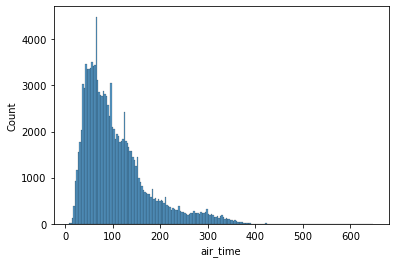

In [28]:
# short haul = 30-180 min.... 
# instead of arbitarily defining categories of short/medum/long lets use quartiles 
sns.histplot(df2['air_time'])

# bonus make this a box plot on top of the histogram

<AxesSubplot:>

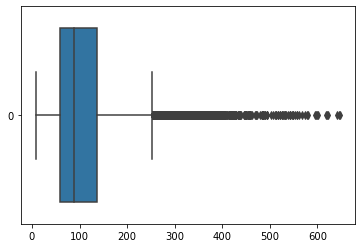

In [29]:
sns.boxplot(data=df2['air_time'], orient='horizontal')

In [30]:
short = df2['air_time'].quantile(0.25)
med = df2['air_time'].quantile(0.75)
long = df2['air_time'].quantile(1)
print(short, med, long)


df2['haul'] = df2['air_time'].apply(lambda x: 'Short' if (x <= short) else ('Medium' if x <= med else 'Long'))
df2[['air_time', 'haul']].dropna()

58.0 136.0 648.0


,air_time,haul
1,79.0,Medium
2,146.0,Long
3,104.0,Medium
4,53.0,Short
5,41.0,Short
...,...,...
127475,46.0,Short
127476,104.0,Medium
127477,245.0,Long
127478,185.0,Long


In [31]:
df2.value_counts('haul')

pd.pivot(df2[['o_hour', 'haul']], columns='haul')
# hmmm... how do we make this...
# we need to have the index be a group by of o_hours and count short,medium, long for each

o_hour             
haul     Long Medium Short
0        13.0    NaN   NaN
1         NaN   10.0   NaN
2        18.0    NaN   NaN
3         NaN   22.0   NaN
4         NaN    NaN  12.0
...       ...    ...   ...
127475    NaN    NaN  16.0
127476    NaN   11.0   NaN
127477   17.0    NaN   NaN
127478   13.0    NaN   NaN
127479   21.0    NaN   NaN

[127480 rows x 3 columns]

In [36]:
df2_temp = pd.get_dummies(df2['haul'])
df2 = pd.concat([df2, df2_temp], axis=1)

In [55]:
# accidentally adde more columns that had to be removed
# df2 = df2.iloc[:, :-6]

In [56]:
df2.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,o_hour,a_hour,state,haul,Long,Medium,Short
0,2018-06-07,DL,DL,DL,1826,DL,N805DN,1826,10397,ATL,"Atlanta, GA",11697,FLL,"Fort Lauderdale, FL",1310,1322.0,12.0,8.0,1330.0,1826.0,8.0,1501,1834.0,NaN,0,NaN,1,N,111,NaN,NaN,1,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,13.0,18.0,GA,Long,1,0,0
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,-4.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,10.0,12.0,OH,Medium,0,1,0
2,2018-06-07,DL,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,-1.0,22.0,1846.0,2012.0,10.0,2034,2022.0,-12.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,18.0,20.0,NY,Long,1,0,0
3,2018-06-07,DL,DL,DL,2415,DL,N988AT,2415,10397,ATL,"Atlanta, GA",11618,EWR,"Newark, NJ",2232,2224.0,-8.0,21.0,2245.0,29.0,3.0,41,32.0,-9.0,0,NaN,0,N,129,128.0,104.0,1,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,22.0,0.0,GA,Medium,0,1,0
4,2018-06-07,DL,DL,DL,2444,DL,N391DA,2444,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1100,1234.0,94.0,19.0,1253.0,1346.0,11.0,1243,1357.0,74.0,0,NaN,0,N,103,83.0,53.0,1,337,0.0,0.0,5.0,0.0,69.0,NaN,NaN,NaN,NaN,6,2018,12.0,14.0,CA,Short,0,0,1


In [57]:
shortH_busy_hour = df2.groupby(by='o_hour').agg('sum')[['Long', 'Medium', 'Short']].sort_values(by='Short', ascending=False).index[0]
medH_busy_hour = df2.groupby(by='o_hour').agg('sum')[['Long', 'Medium', 'Short']].sort_values(by='Medium', ascending=False).index[0]
longH_busy_hour = df2.groupby(by='o_hour').agg('sum')[['Long', 'Medium', 'Short']].sort_values(by='Long', ascending=False).index[0]

print("Short Haul Bussiest Hour: ", shortH_busy_hour)
print("Medium Haul Bussiest Hour: ", medH_busy_hour)
print("Long Haul Bussiest Hour: ", longH_busy_hour)

#interesting results, so businest hour is in the mornings usually 

Short Haul Bussiest Hour:  10.0
Medium Haul Bussiest Hour:  6.0
Long Haul Bussiest Hour:  7.0


In [58]:
df2.groupby(by='o_hour').count()['flights'].sort_values(ascending=False)
# I guess this is the case, as we can see businest time is 6am! work flights?
# These are all domestic flights after all

o_hour
6.0     8717
8.0     8201
12.0    7955
10.0    7905
7.0     7894
17.0    7569
11.0    7499
18.0    7398
14.0    7371
15.0    7282
16.0    7167
9.0     7034
13.0    6913
20.0    6705
19.0    6364
21.0    4243
22.0    4070
5.0     2657
23.0    1494
0.0      452
1.0      241
24.0     186
4.0       61
2.0       56
3.0       36
Name: flights, dtype: int64

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [59]:
df2.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,o_hour,a_hour,state,haul,Long,Medium,Short
0,2018-06-07,DL,DL,DL,1826,DL,N805DN,1826,10397,ATL,"Atlanta, GA",11697,FLL,"Fort Lauderdale, FL",1310,1322.0,12.0,8.0,1330.0,1826.0,8.0,1501,1834.0,NaN,0,NaN,1,N,111,NaN,NaN,1,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,13.0,18.0,GA,Long,1,0,0
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,-4.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,10.0,12.0,OH,Medium,0,1,0
2,2018-06-07,DL,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,-1.0,22.0,1846.0,2012.0,10.0,2034,2022.0,-12.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,18.0,20.0,NY,Long,1,0,0
3,2018-06-07,DL,DL,DL,2415,DL,N988AT,2415,10397,ATL,"Atlanta, GA",11618,EWR,"Newark, NJ",2232,2224.0,-8.0,21.0,2245.0,29.0,3.0,41,32.0,-9.0,0,NaN,0,N,129,128.0,104.0,1,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,22.0,0.0,GA,Medium,0,1,0
4,2018-06-07,DL,DL,DL,2444,DL,N391DA,2444,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1100,1234.0,94.0,19.0,1253.0,1346.0,11.0,1243,1357.0,74.0,0,NaN,0,N,103,83.0,53.0,1,337,0.0,0.0,5.0,0.0,69.0,NaN,NaN,NaN,NaN,6,2018,12.0,14.0,CA,Short,0,0,1


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

# Bonus Stuff:

In [76]:
df2.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,o_hour,a_hour,state,haul,Long,Medium,Short
0,2018-06-07,DL,DL,DL,1826,DL,N805DN,1826,10397,ATL,"Atlanta, GA",11697,FLL,"Fort Lauderdale, FL",1310,1322.0,12.0,8.0,1330.0,1826.0,8.0,1501,1834.0,NaN,0,NaN,1,N,111,NaN,NaN,1,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,13.0,18.0,GA,Long,1,0,0
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,-4.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,10.0,12.0,OH,Medium,0,1,0


In [97]:
print("mkt_unique_carrier length: ", df2['mkt_unique_carrier'].unique().__len__()) 
print("mkt_unique_carrier length: ", df2['branded_code_share'].unique().__len__())
print("mkt_carrier length: ", df2['mkt_carrier'].unique().__len__())
print("op_unique_carrier length: ", df2['op_unique_carrier'].unique().__len__())


#hmm there is more codes in the 'branded_code_share' column

mkt_unique_carrier length:  11
mkt_unique_carrier length:  16
mkt_carrier length:  11
op_unique_carrier length:  28


In [89]:
print("mkt_unique_carrier: ", df2['mkt_unique_carrier'].unique())
print("branded_code_share: ", df2['branded_code_share'].unique())

#to do: sort them by alphabet and compare... 

mkt_unique_carrier:  ['DL' 'AS' 'B6' 'UA' 'NK' 'AA' 'G4' 'WN' 'F9' 'HA' 'VX']
branded_code_share:  ['DL' 'DL_CODESHARE' 'AS' 'B6' 'UA_CODESHARE' 'NK' 'AA_CODESHARE' 'AA'
 'G4' 'WN' 'F9' 'AS_CODESHARE' 'HA' 'UA' 'HA_CODESHARE' 'VX']


In [99]:
# op_carrier_fl_num... is this used for the same route again and again?

df2['op_carrier_fl_num'].value_counts()[:5] 
# this shows the top 5 frequent flight numbers. Lets go look at 1 example and understand more

511     63
64      59
1148    58
1078    56
347     56
Name: op_carrier_fl_num, dtype: int64

In [103]:
df2_temp = df2.loc[df2['op_carrier_fl_num'] == 511]
df2_temp.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,o_hour,a_hour,state,haul,Long,Medium,Short
593,2018-06-10,G4,G4,G4,511,G4,306NV,511,10849,BZN,"Bozeman, MT",12889,LAS,"Las Vegas, NV",2147,20.0,153.0,8.0,28.0,106.0,5.0,2247,111.0,144.0,0,NaN,0,N,120,111.0,98.0,1,701,9.0,0.0,0.0,0.0,135.0,NaN,NaN,NaN,NaN,6,2018,0.0,1.0,MT,Medium,0,1,0
664,2018-06-10,UA,UA,UA,511,UA,N77258,511,13930,ORD,"Chicago, IL",10423,AUS,"Austin, TX",2001,2004.0,3.0,24.0,2028.0,2301.0,9.0,2245,2310.0,25.0,0,NaN,0,N,164,186.0,153.0,1,977,0.0,0.0,25.0,0.0,0.0,NaN,NaN,NaN,NaN,6,2018,20.0,23.0,IL,Long,1,0,0
1425,2018-06-15,NK,NK,NK,511,NK,N670NK,511,11433,DTW,"Detroit, MI",12889,LAS,"Las Vegas, NV",1112,1113.0,1.0,9.0,1122.0,1206.0,6.0,1226,1212.0,-14.0,0,NaN,0,N,254,239.0,224.0,1,1749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,11.0,12.0,MI,Long,1,0,0
3420,2018-06-25,DL,DL,DL,511,DL,N968AT,511,14869,SLC,"Salt Lake City, UT",11298,DFW,"Dallas/Fort Worth, TX",955,950.0,-5.0,14.0,1004.0,1305.0,16.0,1342,1321.0,-21.0,0,NaN,0,N,167,151.0,121.0,1,989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,10.0,13.0,UT,Medium,0,1,0
5133,2019-11-05,NK,NK,NK,511,NK,N670NK,511,11433,DTW,"Detroit, MI",12889,LAS,"Las Vegas, NV",1125,1117.0,-8.0,9.0,1126.0,1225.0,6.0,1255,1231.0,-24.0,0,NaN,0,N,270,254.0,239.0,1,1749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2019,11.0,12.0,MI,Long,1,0,0


In [105]:
df2_temp.groupby(by="origin_airport_id").count().sort_values(by='fl_date', ascending=False)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,o_hour,a_hour,state,haul,Long,Medium,Short
origin_airport_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11433,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,0,10,10,10,10,10,10,10,1,1,1,1,1,0,0,0,0,10,10,10,10,10,10,10,10,10
11697,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,0,9,9,9,9,9,9,9,1,1,1,1,1,0,0,0,0,9,9,9,9,9,9,9,9,9
10721,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0,7,7,7,7,7,7,7,4,4,4,4,4,0,0,0,0,7,7,7,7,7,7,7,7,7
10792,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5,5,5,5,2,2,2,2,2,0,0,0,0,5,5,5,5,5,5,5,5,5
12264,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5,5,5,5,1,1,1,1,1,0,0,0,0,5,5,5,5,5,5,5,5,5
12892,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,4,4,4,4,4,4,4,1,1,1,1,1,0,0,0,0,4,4,4,4,4,4,4,4,4
13930,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3,2,2,2,2,2,0,0,0,0,3,3,3,3,3,3,3,3,3
12889,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3
13232,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3,2,2,2,2,2,0,0,0,0,3,3,3,3,3,3,3,3,3


## Unique Aiport Table
- Import, add stats

In [112]:
airports = pd.read_csv('/Users/josephluiz/lighthouse/lighthouse-data-notes/Week_5/Day_5/mid-term-project-I/Joe_Files/Extracts/unique_origin_airports.csv')
#clean this up a bit
airports.rename(columns={'origin_airport_id': 'airport_id', 'origin':'airport_code'}, inplace=True)
split = airports['origin_city_name'].str.split(",", n=1, expand=True)
airports['city'] = split[0]
airports['state'] = split[1]
airports.drop('origin_city_name', axis=1, inplace=True)
airports.head()

,airport_id,airport_code,city,state
0,10135,ABE,Allentown/Bethlehem/Easton,PA
1,10136,ABI,Abilene,TX
2,10140,ABQ,Albuquerque,NM
3,10141,ABR,Aberdeen,SD
4,10146,ABY,Albany,GA


In [102]:
airports.shape

(376, 4)

#### avg origin delay by airportID

In [113]:
df2.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,o_hour,a_hour,state,haul,Long,Medium,Short
0,2018-06-07,DL,DL,DL,1826,DL,N805DN,1826,10397,ATL,"Atlanta, GA",11697,FLL,"Fort Lauderdale, FL",1310,1322.0,12.0,8.0,1330.0,1826.0,8.0,1501,1834.0,NaN,0,NaN,1,N,111,NaN,NaN,1,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,13.0,18.0,GA,Long,1,0,0
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,-4.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,10.0,12.0,OH,Medium,0,1,0
2,2018-06-07,DL,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,-1.0,22.0,1846.0,2012.0,10.0,2034,2022.0,-12.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,18.0,20.0,NY,Long,1,0,0
3,2018-06-07,DL,DL,DL,2415,DL,N988AT,2415,10397,ATL,"Atlanta, GA",11618,EWR,"Newark, NJ",2232,2224.0,-8.0,21.0,2245.0,29.0,3.0,41,32.0,-9.0,0,NaN,0,N,129,128.0,104.0,1,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,22.0,0.0,GA,Medium,0,1,0
4,2018-06-07,DL,DL,DL,2444,DL,N391DA,2444,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1100,1234.0,94.0,19.0,1253.0,1346.0,11.0,1243,1357.0,74.0,0,NaN,0,N,103,83.0,53.0,1,337,0.0,0.0,5.0,0.0,69.0,NaN,NaN,NaN,NaN,6,2018,12.0,14.0,CA,Short,0,0,1


In [115]:
airports_temp = pd.DataFrame(df2.groupby('origin_airport_id').agg('median')['dep_delay'])
airports_temp.reset_index(inplace=True)
airports_temp.rename(columns={'origin_airport_id':'airport_id'}, inplace=True)
airports_temp.head()

,airport_id,dep_delay
0,10135,-4.0
1,10136,-1.0
2,10140,-2.0
3,10141,-0.5
4,10146,-3.5


In [116]:
airports = airports.merge(airports_temp, on='airport_id')
airports.rename(columns={'dep_delay':'median_d_delay'}, inplace=True)
airports.head()

,airport_id,airport_code,city,state,median_d_delay
0,10135,ABE,Allentown/Bethlehem/Easton,PA,-4.0
1,10136,ABI,Abilene,TX,-1.0
2,10140,ABQ,Albuquerque,NM,-2.0
3,10141,ABR,Aberdeen,SD,-0.5
4,10146,ABY,Albany,GA,-3.5


In [117]:
airports.sort_values(by='median_d_delay', ascending=False)
#just checking this oput

,airport_id,airport_code,city,state,median_d_delay
166,12250,HYA,Hyannis,MA,56.0
148,11997,GST,Gustavus,AK,48.0
282,14231,PQI,Presque Isle/Houlton,ME,44.0
281,14222,PPG,Pago Pago,TT,21.0
283,14237,PRC,Prescott,AZ,18.0
...,...,...,...,...,...
134,11865,GCC,Gillette,WY,-14.0
370,15991,YAK,Yakutat,AK,-15.0
106,11447,DVL,Devils Lake,ND,-15.0
99,11336,DLG,Dillingham,AK,-15.0


#### STD for delays

In [107]:
airports_temp = df2.groupby('origin_airport_id').agg('std')[['dep_delay', 'arr_delay']].round(2)
airports_temp.reset_index(inplace=True)
airports_temp.rename(columns={'origin_airport_id':'airport_id'}, inplace=True)
airports_temp.head()

,airport_id,dep_delay,arr_delay
0,10135,56.55,56.33
1,10136,13.64,13.65
2,10140,34.03,34.81
3,10141,39.93,42.34
4,10146,124.23,124.32


In [108]:
airports = airports.merge(airports_temp, on='airport_id')
airports.rename(columns={'dep_delay':'std_d_delay', 'arr_delay':'std_a_delay'}, inplace=True)
airports.head()

,airport_id,airport_code,city,state,median_d_delay,median_a_delay,std_d_delay,std_a_delay
0,10135,ABE,Allentown/Bethlehem/Easton,PA,-4.0,-6.5,56.55,56.33
1,10136,ABI,Abilene,TX,-1.0,3.0,13.64,13.65
2,10140,ABQ,Albuquerque,NM,-2.0,-6.0,34.03,34.81
3,10141,ABR,Aberdeen,SD,-0.5,-7.5,39.93,42.34
4,10146,ABY,Albany,GA,-3.5,-5.0,124.23,124.32


#### Export to CSV for use

In [109]:
airports.to_csv('airorts_features')

#### Can we get these stats for each month and append it on

In [110]:
df2.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,o_hour,a_hour,state,haul,Long,Medium,Short
0,2018-06-07,DL,DL,DL,1826,DL,N805DN,1826,10397,ATL,"Atlanta, GA",11697,FLL,"Fort Lauderdale, FL",1310,1322.0,12.0,8.0,1330.0,1826.0,8.0,1501,1834.0,NaN,0,NaN,1,N,111,NaN,NaN,1,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,13.0,18.0,GA,Long,1,0,0
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,-4.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,10.0,12.0,OH,Medium,0,1,0


In [111]:
df2.pivot_table(values='dep_delay', index='origin_airport_id', columns='month', aggfunc='median')
# ok so this is the median for each month of origin delay

month,1,2,3,4,5,6,7,8,9,10,11,12
origin_airport_id,,,,,,,,,,,,
10135,-5.0,-5.0,-3.0,2.5,-1.0,4.0,8.0,-5.5,-3.0,-5.0,-4.0,-6.0
10136,9.0,-10.0,NaN,NaN,-3.0,8.0,1.0,6.5,2.0,7.0,-5.0,-9.5
10140,-3.0,-2.5,-1.0,-3.0,-1.5,-2.0,-3.0,-0.5,-3.0,-1.5,-3.0,-1.0
10141,6.0,-9.0,63.0,85.0,NaN,NaN,-0.5,-5.0,-10.0,-8.0,-6.0,4.0
10146,-1.0,243.0,-3.0,-10.0,-6.0,-5.0,NaN,0.0,-4.0,-3.0,-7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
15919,-4.0,-2.5,-3.0,-6.0,-5.5,-4.0,-4.0,-3.5,-4.0,-4.0,-5.0,-1.0
15991,-29.0,NaN,NaN,NaN,-8.0,1.0,0.5,0.0,NaN,NaN,-26.0,-14.0
16101,-1.0,NaN,-5.0,36.0,-6.5,-4.0,-8.0,NaN,NaN,29.0,NaN,14.0


### Stripped Down data for baseline model

In [95]:
df2_stripped = df2.copy()
df2.drop(['mkt_unique_carrier'], axis=1)

,fl_date,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,o_hour,a_hour,state,haul,Long,Medium,Short
0,2018-06-07,DL,DL,1826,DL,N805DN,1826,10397,ATL,"Atlanta, GA",11697,FLL,"Fort Lauderdale, FL",1310,1322.0,12.0,8.0,1330.0,1826.0,8.0,1501,1834.0,NaN,0,NaN,1,N,111,NaN,NaN,1,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,13.0,18.0,GA,Long,1,0,0
1,2018-06-07,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,-4.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,10.0,12.0,OH,Medium,0,1,0
2,2018-06-07,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,-1.0,22.0,1846.0,2012.0,10.0,2034,2022.0,-12.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,18.0,20.0,NY,Long,1,0,0
3,2018-06-07,DL,DL,2415,DL,N988AT,2415,10397,ATL,"Atlanta, GA",11618,EWR,"Newark, NJ",2232,2224.0,-8.0,21.0,2245.0,29.0,3.0,41,32.0,-9.0,0,NaN,0,N,129,128.0,104.0,1,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,22.0,0.0,GA,Medium,0,1,0
4,2018-06-07,DL,DL,2444,DL,N391DA,2444,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1100,1234.0,94.0,19.0,1253.0,1346.0,11.0,1243,1357.0,74.0,0,NaN,0,N,103,83.0,53.0,1,337,0.0,0.0,5.0,0.0,69.0,NaN,NaN,NaN,NaN,6,2018,12.0,14.0,CA,Short,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127475,2018-06-07,UA_CODESHARE,UA,3855,ZW,N448AW,3855,12339,IND,"Indianapolis, IN",13930,ORD,"Chicago, IL",1655,1642.0,-13.0,12.0,1654.0,1640.0,14.0,1705,1654.0,-11.0,0,NaN,0,N,70,72.0,46.0,1,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,16.0,17.0,IN,Short,0,0,1
127476,2018-06-07,DL,DL,1107,DL,N776DE,1107,13204,MCO,"Orlando, FL",11193,CVG,"Cincinnati, OH",1112,1138.0,26.0,11.0,1149.0,1333.0,5.0,1314,1338.0,24.0,0,NaN,0,N,122,120.0,104.0,1,757,0.0,0.0,0.0,0.0,24.0,NaN,NaN,NaN,NaN,6,2018,11.0,13.0,FL,Medium,0,1,0
127477,2018-06-07,DL,DL,1269,DL,N3771K,1269,11433,DTW,"Detroit, MI",12892,LAX,"Los Angeles, CA",1750,1748.0,-2.0,13.0,1801.0,1906.0,5.0,1938,1911.0,-27.0,0,NaN,0,N,288,263.0,245.0,1,1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,17.0,19.0,MI,Long,1,0,0
127478,2018-06-07,DL,DL,1347,DL,N6701,1347,12892,LAX,"Los Angeles, CA",13487,MSP,"Minneapolis, MN",1315,1329.0,14.0,17.0,1346.0,1851.0,4.0,1854,1855.0,1.0,0,NaN,0,N,219,206.0,185.0,1,1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,13.0,19.0,CA,Long,1,0,0
